# CUT MATERIAL from descriptive statistics

(DEPRECATED) leftovers from working on the descriptive statistics notebook
- see [notebooks/13_descriptive_statistics.ipynb](../../notebooks/13_descriptive_statistics.ipynb) for clean version
- see [figures_generation/descr_stats.ipynb](../../figures_generation/descr_stats.ipynb) for code to generate figs





### Notebooks setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Pandas setup
pd.set_option("display.precision", 2)

## Data

In [3]:
#@title Load CSV data
import io
data_file = io.StringIO("""
student_ID,background,curriculum,effort,score
1,arts,debate,10.96,75
2,science,lecture,8.69,75
3,arts,debate,8.6,67
4,arts,lecture,7.92,70.3
5,science,debate,9.9,76.1
6,business,debate,10.8,79.8
7,science,lecture,7.81,72.7
8,business,lecture,9.13,75.4
9,business,lecture,5.21,57
10,science,lecture,7.71,69
11,business,debate,9.82,70.4
12,arts,debate,11.53,96.2
13,science,debate,7.1,62.9
14,science,lecture,6.39,57.6
15,arts,debate,12,84.3
""")

In [4]:
students = pd.read_csv(data_file, index_col="student_ID")
students

,background,curriculum,effort,score
student_ID,,,,
1,arts,debate,10.96,75.0
2,science,lecture,8.69,75.0
3,arts,debate,8.60,67.0
4,arts,lecture,7.92,70.3
5,science,debate,9.90,76.1
6,business,debate,10.80,79.8
7,science,lecture,7.81,72.7
8,business,lecture,9.13,75.4
9,business,lecture,5.21,57.0


In [5]:
students['score'].kurtosis()

1.2432566126891702

In [6]:
students['score'].skew()

0.5777104618591472

# CUT MATERIAL

In [7]:
pd.pivot_table(
    data=students,
    index="curriculum",
    columns="background",
    values="score",       # dummy placeholder
    aggfunc="count",
    fill_value=0,
    margins=True,
)

background,arts,business,science,All
curriculum,,,,
debate,4,2,2,8
lecture,1,2,4,7
All,5,4,6,15


In [8]:
# equivalent using groupby + multiindex
students.groupby(["curriculum", "background"])["background"].count().unstack().fillna(0)

background,arts,business,science
curriculum,,,
debate,4,2,2
lecture,1,2,4


<AxesSubplot:xlabel='background', ylabel='curriculum'>

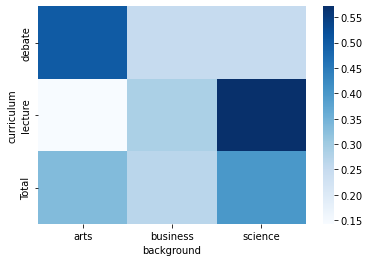

In [9]:
sns.heatmap(
    pd.crosstab(
        index=students["curriculum"],
        columns=students["background"],
        margins=True,
        normalize="index",
        margins_name="Total",
    ),
    cmap="Blues"
)

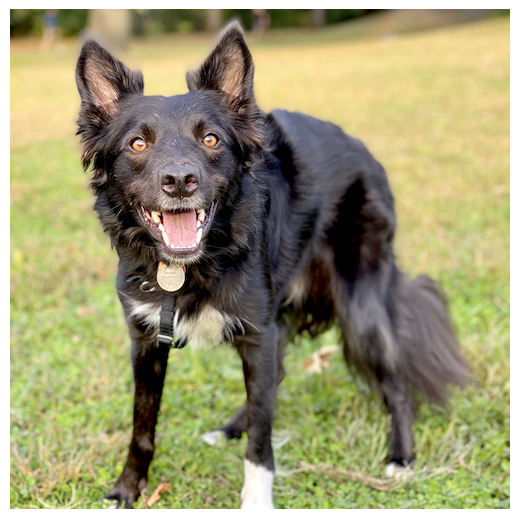

In [10]:
sns.dogplot()

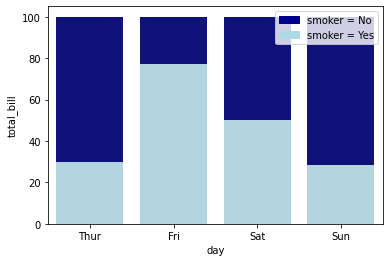

In [11]:
# import libraries
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# load dataset
tips = sns.load_dataset("tips")

# set the figure size
# plt.figure(figsize=(14, 14))

# from raw value to percentage
total = tips.groupby('day')['total_bill'].sum().reset_index()
smoker = tips[tips.smoker=='Yes'].groupby('day')['total_bill'].sum().reset_index()
smoker['total_bill'] = [i / j * 100 for i,j in zip(smoker['total_bill'], total['total_bill'])]
total['total_bill'] = [i / j * 100 for i,j in zip(total['total_bill'], total['total_bill'])]

# bar chart 1 -> top bars (group of 'smoker=No')
bar1 = sns.barplot(x="day",  y="total_bill", data=total, color='darkblue')

# bar chart 2 -> bottom bars (group of 'smoker=Yes')
bar2 = sns.barplot(x="day", y="total_bill", data=smoker, color='lightblue')

# add legend
top_bar = mpatches.Patch(color='darkblue', label='smoker = No')
bottom_bar = mpatches.Patch(color='lightblue', label='smoker = Yes')
plt.legend(handles=[top_bar, bottom_bar])

# show the graph
plt.show()

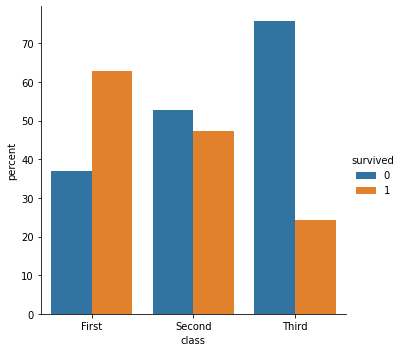

In [12]:
df = sns.load_dataset('titanic')

(df
  .groupby('class')['survived']
  .value_counts(normalize=True)
  .mul(100)
  .rename('percent')
  .reset_index()
  .pipe((sns.catplot, 'data'), x='class', y='percent', hue='survived', kind='bar')
)


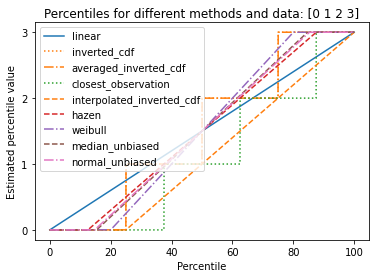

In [13]:
import matplotlib.pyplot as plt

a = np.arange(4)
p = np.linspace(0, 100, 6001)
ax = plt.gca()

lines = [
    ('linear', '-', 'C0'),
    ('inverted_cdf', ':', 'C1'),
    # Almost the same as `inverted_cdf`:
    ('averaged_inverted_cdf', '-.', 'C1'),
    ('closest_observation', ':', 'C2'),
    ('interpolated_inverted_cdf', '--', 'C1'),
    ('hazen', '--', 'C3'),
    ('weibull', '-.', 'C4'),
    ('median_unbiased', '--', 'C5'),
    ('normal_unbiased', '-.', 'C6'),
]

for method, style, color in lines:
    ax.plot(
        p, np.percentile(a, p, method=method),
        label=method, linestyle=style, color=color
    )

ax.set(
    title='Percentiles for different methods and data: ' + str(a),
    xlabel='Percentile',
    ylabel='Estimated percentile value',
    yticks=a
)
ax.legend()
plt.show()


In [14]:
import numpy as np

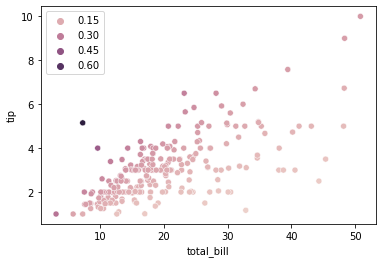

In [15]:
tips = sns.load_dataset("tips")
tip_rate = tips.eval("tip / total_bill")
ax = sns.scatterplot(data=tips, x="total_bill", y="tip", hue=tip_rate)


In [16]:
tips.assign(tip_rate=tips.eval("tip / total_bill"))

,total_bill,tip,sex,smoker,day,time,size,tip_rate
0,16.99,1.01,Female,No,Sun,Dinner,2,0.06
1,10.34,1.66,Male,No,Sun,Dinner,3,0.16
2,21.01,3.50,Male,No,Sun,Dinner,3,0.17
3,23.68,3.31,Male,No,Sun,Dinner,2,0.14
4,24.59,3.61,Female,No,Sun,Dinner,4,0.15
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.20
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.07
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.09
242,17.82,1.75,Male,No,Sat,Dinner,2,0.10


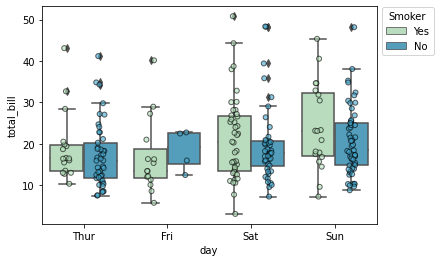

In [17]:
import seaborn as sns

# load the dataframe
tips = sns.load_dataset('tips')

ax = sns.boxplot(x="day", y="total_bill", hue="smoker", data=tips, palette="GnBu", zorder=0)

# add stripplot with dodge=True
sns.stripplot(x="day", y="total_bill", hue="smoker", data=tips, palette="GnBu",
              dodge=True, ax=ax, ec='k', linewidth=1, alpha=0.6)

# remove extra legend handles
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:2], labels[:2], title='Smoker', bbox_to_anchor=(1, 1.02), loc='upper left')



In [18]:
# Fancy descriptiv statistics
# import pandas_profiling
# students.profile_report()